## PHYS-85200 - Machine Learning for Physicists
### Student: Gehan Ranepura
### Worksheet #2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import pydotplus
import sklearn

from sklearn.model_selection import train_test_split #we don't use it here, but it's a useful function!
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import metrics                          
from sklearn import tree
from sklearn import neighbors
from io import StringIO
from IPython.display import Image  

font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

#### 1. If you had to eliminate one feature without compromising performance too much, which one would you pick, and why? 
- I would remove the feature for period because it is closely related to distance due to Kepler's third law

In [3]:
df = pd.read_csv('HPLearningSet.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head(18)
LearningSet = df

#### 2. In class, we used k = 3 neighbors in the kNN algorithm. Would you recommend increasing the number of neighbors used in the classification for this data set? Why or why not? 

- Yes, we should use k = 5 for this dataset because small value of k (like 3) could lead to overfitting and too large of value of k can lead to underfitting.

#### 3. Figure out the maximum Gini impurity in a N-class classification problem. 

In [4]:
print(df['P_HABITABLE'].value_counts()[0])
print(df['P_HABITABLE'].value_counts()[1])

10
8


## Gini (node L) = 
$$ 1 - \sum \limits _{i} f(i)^2 $$

$$ = 1 - \left( \frac{10}{18} \right)^2 - \left( \frac{8}{18}\right)^2 $$
$$ = 1 - \frac{164}{324} = \frac{160}{324} = \frac{40}{81} $$
$$ = 0.494 $$

#### 4. If you used the two decision trees obtained in the DT notebook, using the first 13 and last 13 objects as training set respectively, to classify the Earth as habitable or not habitable, what verdict would you obtain? What can you conclude from this result? 

VERDICT:
- using the first 13 objects as the training test and last 5 objects as the test set resulted in a 60% accuracy score for the test set 
- using the last 13 objects as the training set and first 5 objects as the set set resulted in 100% accoracy score for the test set

CONCLUSION:
- There seems to be a better representation of data as a whole for this DT model when using the last 13 objects as the training set. Therefore, the concern is that the dataset is too small to create an accourate DT model because the success of test set is dependent on how the training set was chosen.

#### 5. Write pseudo-code (a sequence of operations in plain English, like the one we showed in class for DT) for the kNN algorithm. 

function BuildkNN(training_data, test_data):
         Choose a value for k
         For each point i, 
             calculate eucleadian distance d to point j
             store distance d into a list
             sort list from lowest to highest
             choose the first k distances 
             index out the k-points associated to the k-distances
             assign point i to a class that is majority class based on the chosen k-points

#### For both the DT and kNN algorithms, check what happens if you vary the training/test set size split (for example, 2/16 or 9/9). 
- When splitting the datasets for 6/12 and 9/9,
. The DT algorithm reaches a test score that doesn't vary too much
. The kNN algorithm does change, suprisignly when the training score was better the test score got worse

# DT 6/12 & KNN 6/12

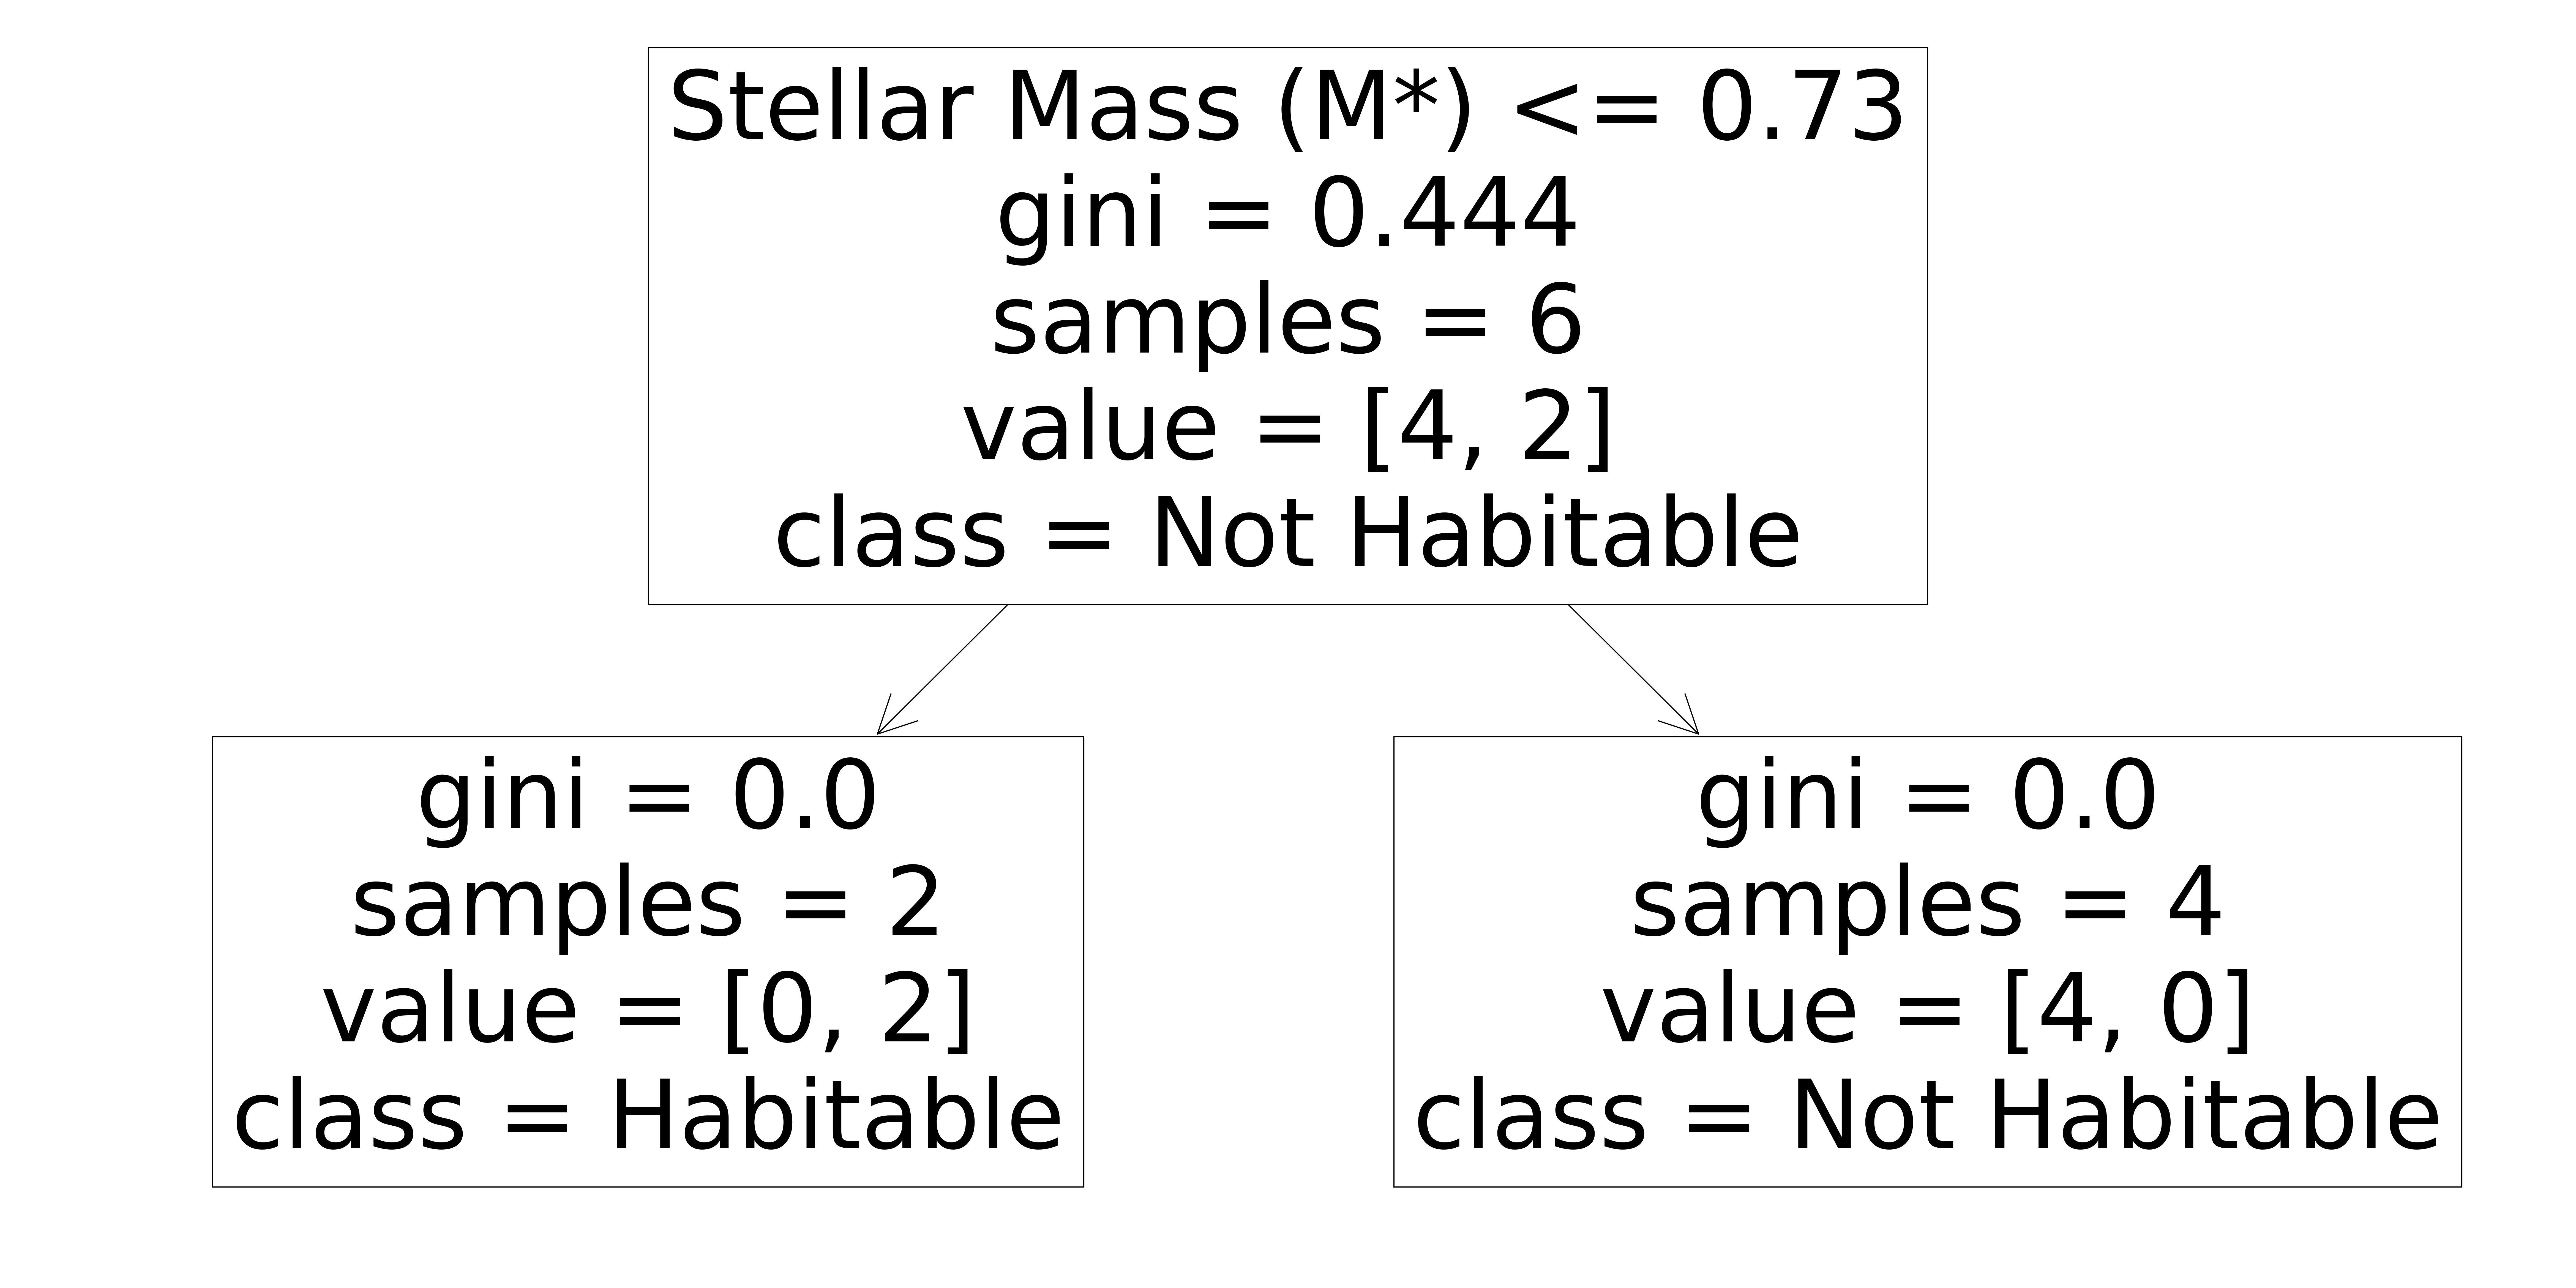

DTtrain_score_6-12 --> 1.0
DTtest_score_6-12  --> 0.5833333333333334
kNNtrain_score_6-12 --> 0.6666666666666666
kNNtest_score_6-12  --> 0.5


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

In [5]:
TrainSet = LearningSet.iloc[:6,:] 
TestSet  = LearningSet.iloc[6:,:]
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
Xtest  = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)
ytrain = TrainSet.P_HABITABLE
ytest  = TestSet.P_HABITABLE
model = DecisionTreeClassifier(random_state = 3) # This is how we specify which method we'd like to use, and any parameters.
model.fit(Xtrain, ytrain)                        # This tiny line is how we build models in sklearn.
plt.figure(figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])
plt.show()

ypred_train = model.predict(Xtrain)
print("DTtrain_score_6-12 -->", metrics.accuracy_score(ytrain, ypred_train))
ypred_test = model.predict(Xtest)
print("DTtest_score_6-12  -->", metrics.accuracy_score(ytest, ypred_test))


model = neighbors.KNeighborsClassifier(n_neighbors = 3)
neighbors.KNeighborsClassifier?
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(Xtrain) # important: we only scale the train set.
scaledXTrain = scaler.transform(Xtrain)
scaledXtest  = scaler.transform(Xtest)
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])
model.kneighbors(scaledXtest[:,:2]) #The distances of neighbors for test set objects look more balanced

print("kNNtrain_score_6-12 -->", metrics.accuracy_score(ytrain, model.predict(scaledXTrain[:,:2])))
print("kNNtest_score_6-12  -->", metrics.accuracy_score(ytest, model.predict(scaledXtest[:,:2]))) 

# DT 9/9 & KNN 9/9

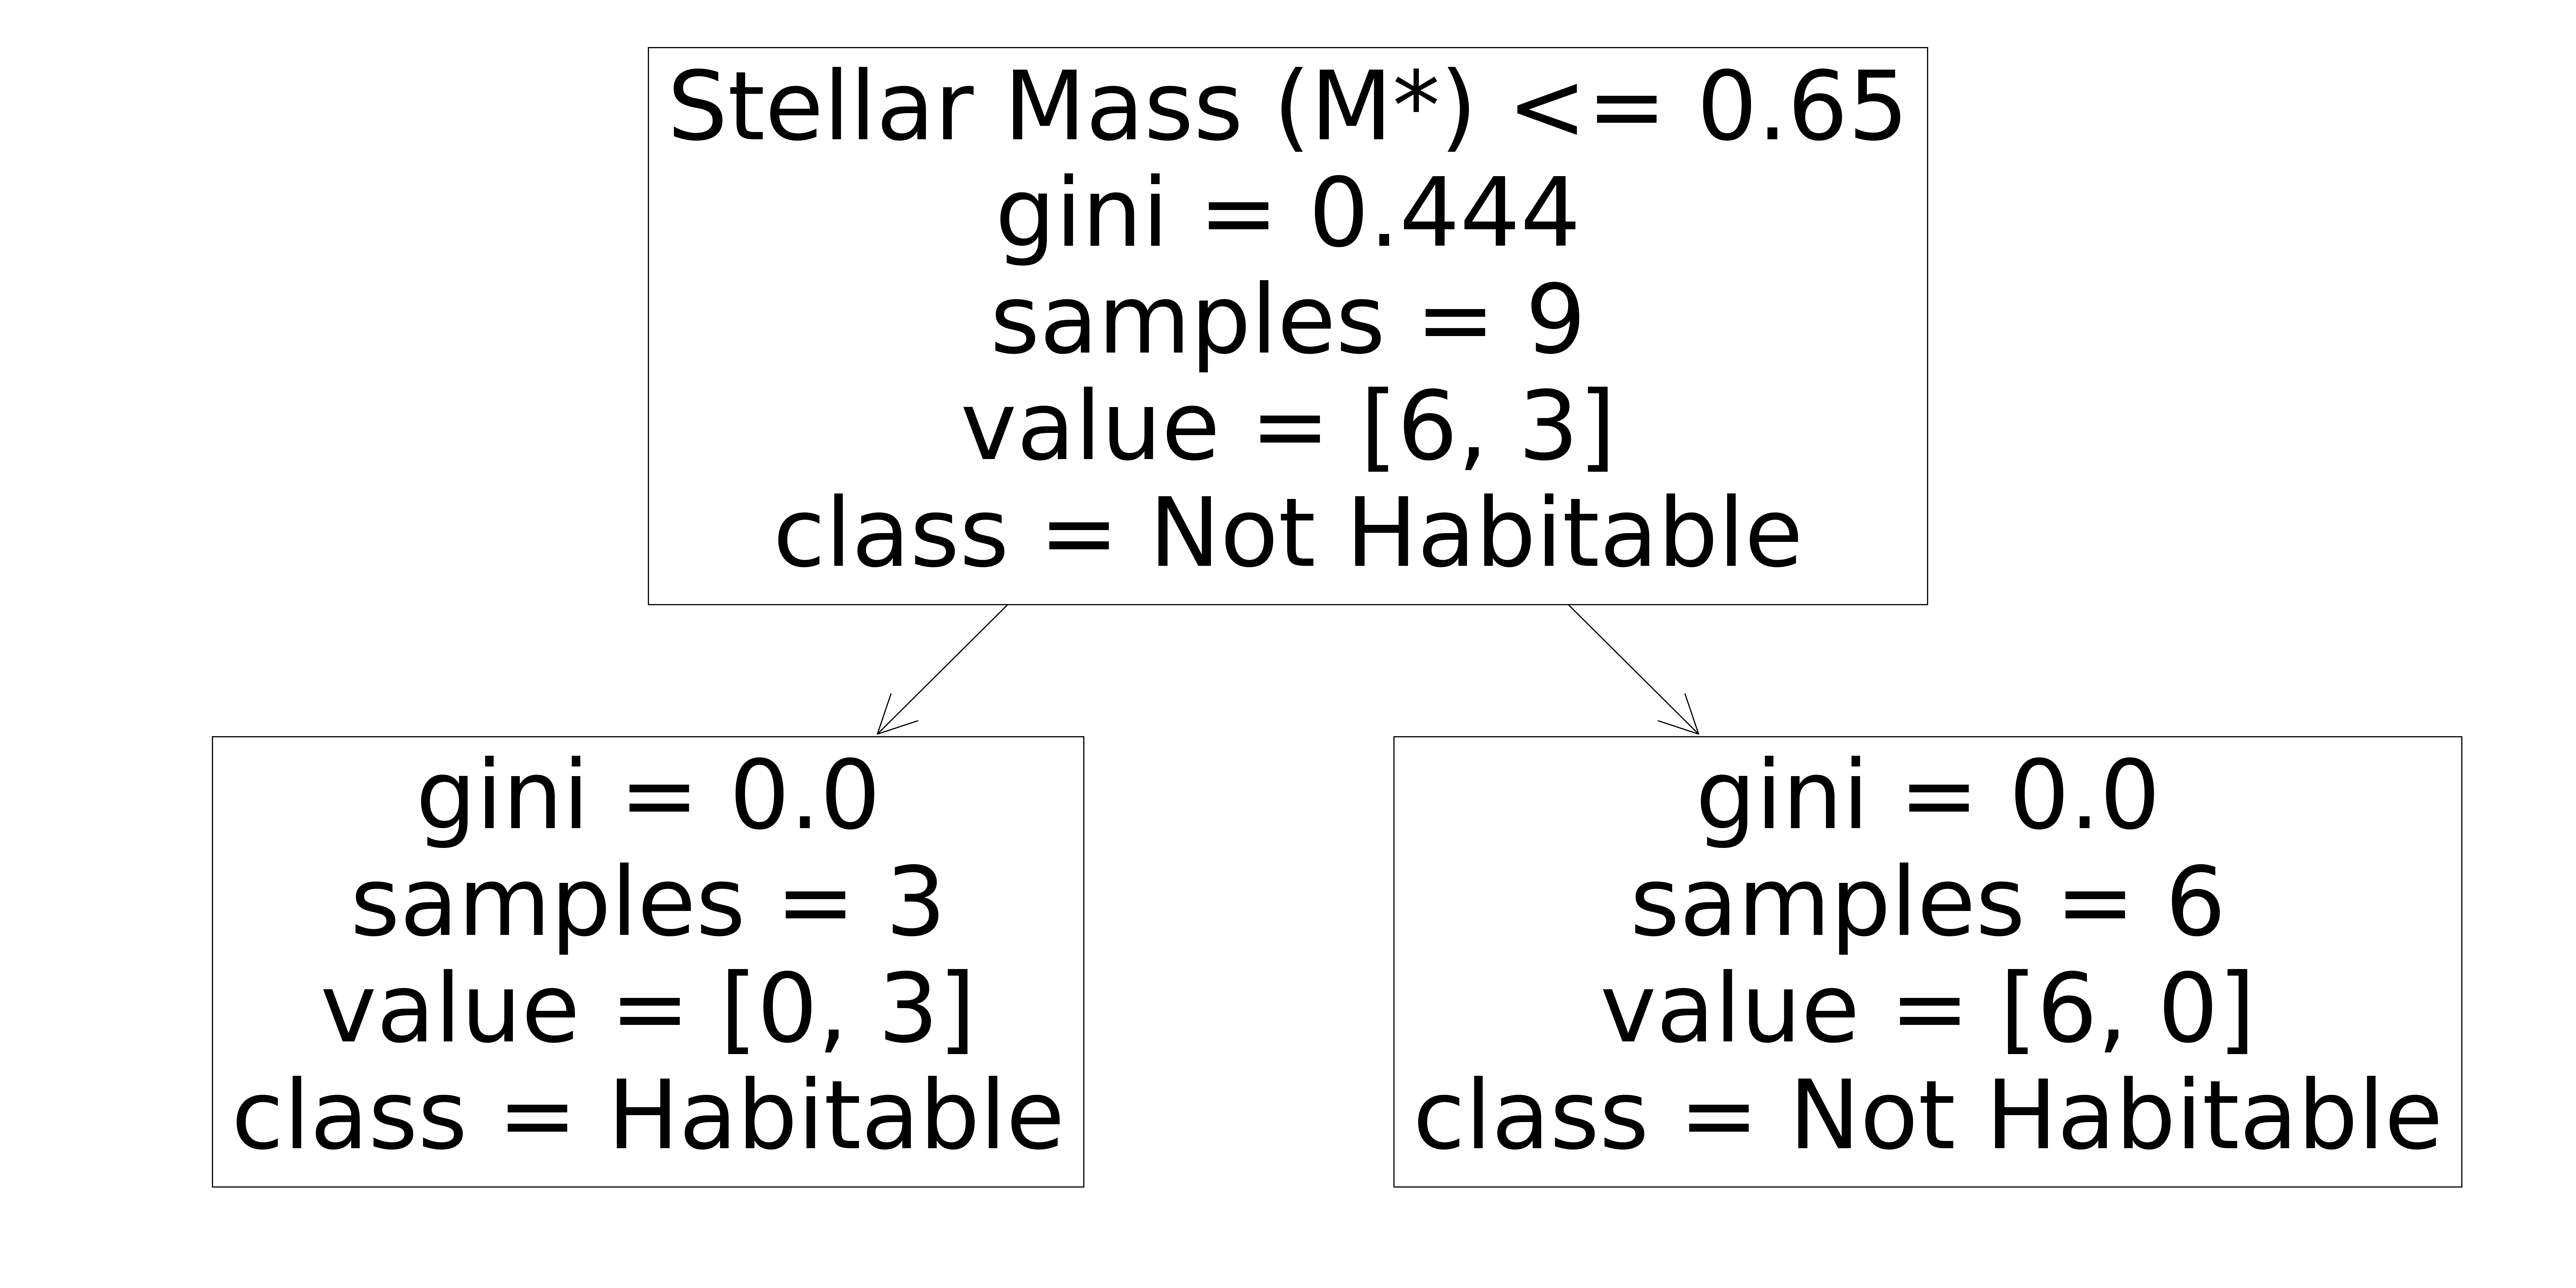

DTtrain_score_6-12 --> 1.0
DTtest_score_6-12  --> 0.5555555555555556
kNNtrain_score_6-12 --> 0.8888888888888888
kNNtest_score_6-12  --> 0.2222222222222222


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

In [6]:
TrainSet = LearningSet.iloc[:9,:] 
TestSet  = LearningSet.iloc[9:,:]
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
Xtest  = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)
ytrain = TrainSet.P_HABITABLE
ytest  = TestSet.P_HABITABLE
model = DecisionTreeClassifier(random_state = 3) # This is how we specify which method we'd like to use, and any parameters.
model.fit(Xtrain, ytrain)                        # This tiny line is how we build models in sklearn.
plt.figure(figsize=(40,20))                      # customize according to the size of your tree
tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])
plt.show()

ypred_train = model.predict(Xtrain)
print("DTtrain_score_6-12 -->", metrics.accuracy_score(ytrain, ypred_train))
ypred_test = model.predict(Xtest)
print("DTtest_score_6-12  -->", metrics.accuracy_score(ytest, ypred_test))


model = neighbors.KNeighborsClassifier(n_neighbors = 3)
neighbors.KNeighborsClassifier?
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(Xtrain) # important: we only scale the train set.
scaledXTrain = scaler.transform(Xtrain)
scaledXtest  = scaler.transform(Xtest)
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])
model.kneighbors(scaledXtest[:,:2]) #The distances of neighbors for test set objects look more balanced

print("kNNtrain_score_6-12 -->", metrics.accuracy_score(ytrain, model.predict(scaledXTrain[:,:2])))
print("kNNtest_score_6-12  -->", metrics.accuracy_score(ytest, model.predict(scaledXtest[:,:2]))) 

NameError: name 'magentapatch' is not defined

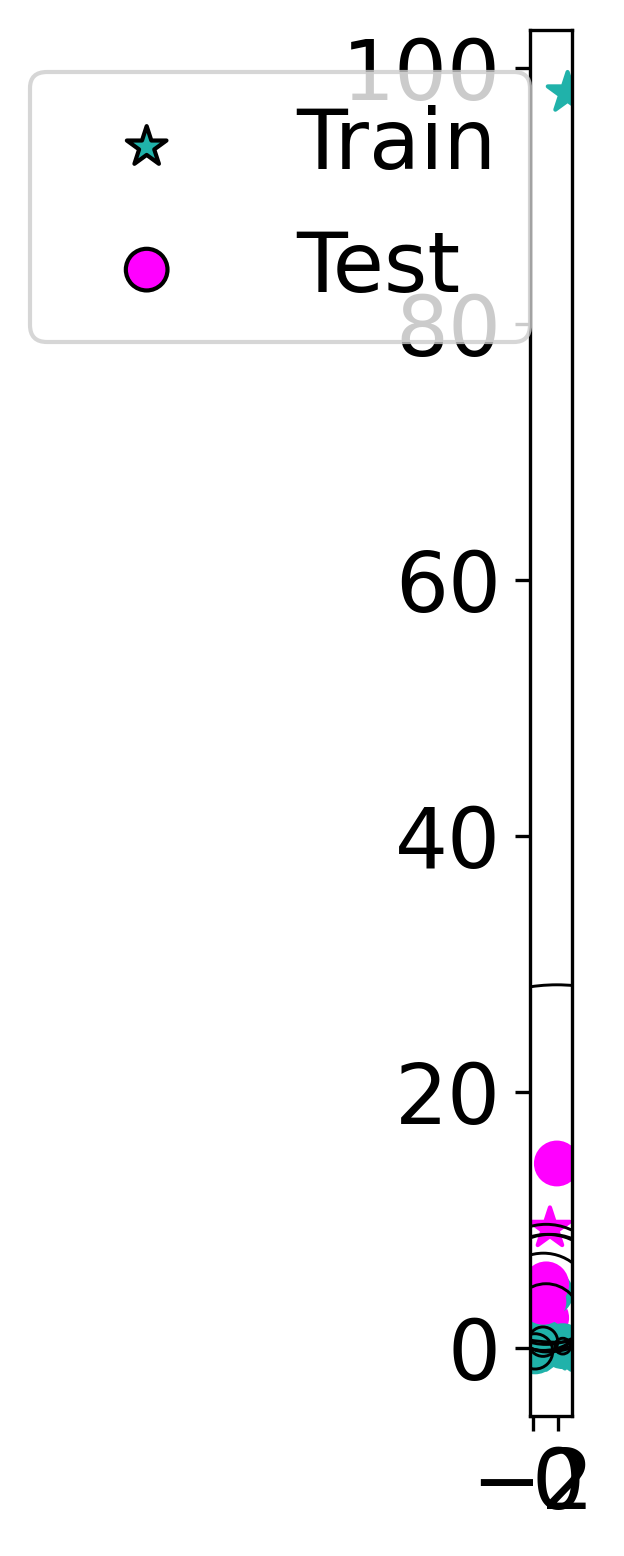

In [10]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):

    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
#leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
#leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper right', fontsize = 8)

plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

#plt.savefig('HabPlanetsKNNscaled.png', dpi = 300)

#### Re-do the kNN exercise using the ``StandardScaler`` option instead of the ``RobustScaler``. 
#### Do you see any significant change? Why? 
#### Would you recommend one over the other? (suggestion: plot each point and their neighbors).  

- The test score was slightly better for k = 9, when using Standard Scaler
- The Robust Scaler lead to a an issue where scaling was inappprotaite for the problem. The mass of the parent star was a dominating feature in this algorithm.
- The Standard Scaler fixed the scaling issue and the algorithm was not dominated by a single feature.

- I would suggest using the Standard Scaler

In [11]:
TrainSet = LearningSet.iloc[:9,:] 
TestSet  = LearningSet.iloc[9:,:]
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
Xtest  = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)
ytrain = TrainSet.P_HABITABLE
ytest  = TestSet.P_HABITABLE

model = neighbors.KNeighborsClassifier(n_neighbors = 3)
neighbors.KNeighborsClassifier?
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(Xtrain) # important: we only scale the train set.
scaledXTrain = scaler.transform(Xtrain)
scaledXtest  = scaler.transform(Xtest)
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])
model.kneighbors(scaledXtest[:,:2]) #The distances of neighbors for test set objects look more balanced

print("kNNtrain_score_6-12 -->", metrics.accuracy_score(ytrain, model.predict(scaledXTrain[:,:2])))
print("kNNtest_score_6-12 -->", metrics.accuracy_score(ytest, model.predict(scaledXtest[:,:2]))) 

kNNtrain_score_6-12 --> 0.8888888888888888
kNNtest_score_6-12 --> 0.3333333333333333


/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/granepura/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no 

NameError: name 'magentapatch' is not defined

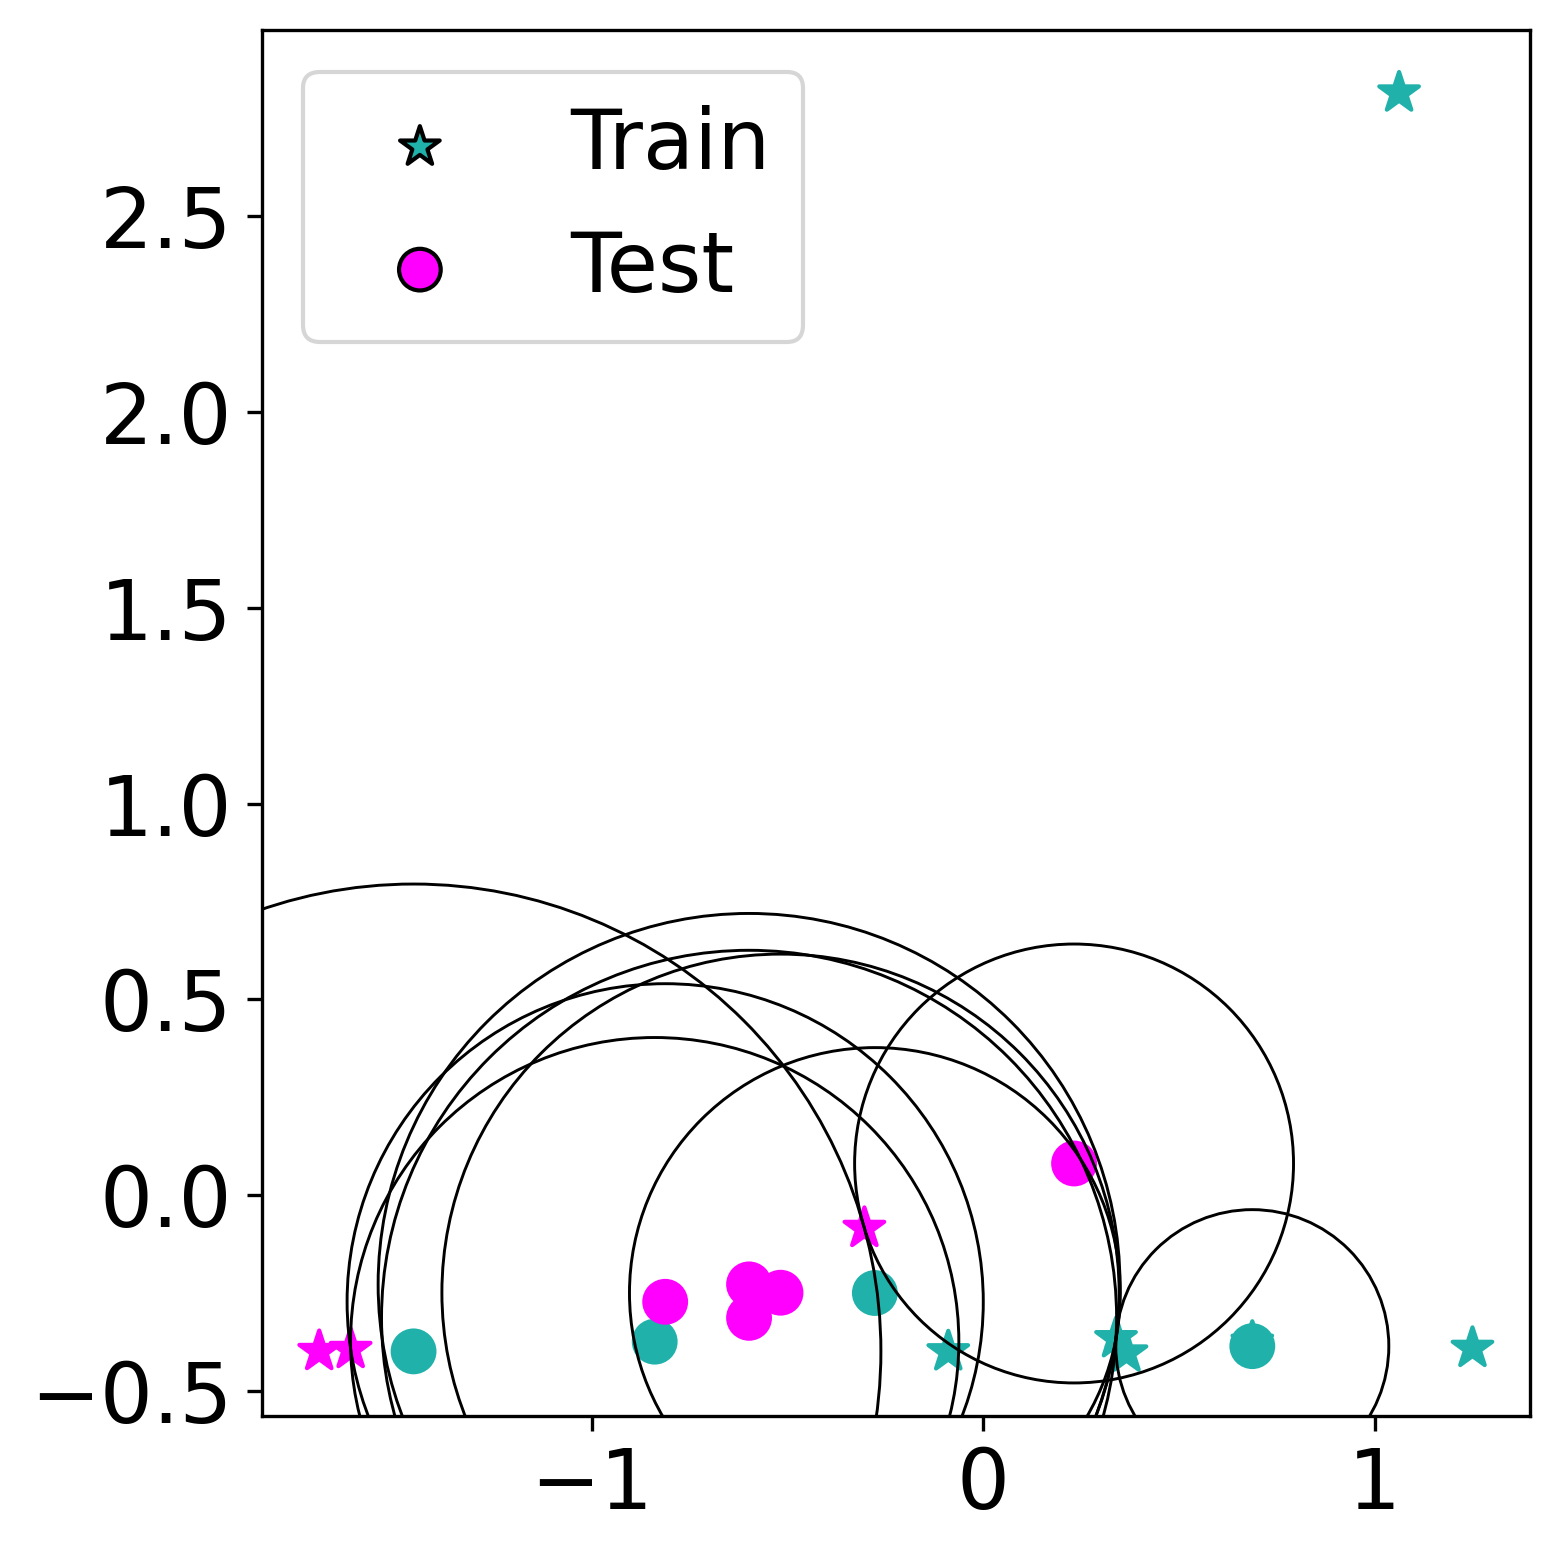

In [12]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):

    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
#leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
#leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper right', fontsize = 14)

plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

### Extra credit but highly recommended: 
#### Pick one between DT and kNN and try to code the algorithm from scratch (my guess is that kNN, with Euclidean distance and uniform weights, is easier, but DT shouldn't be so bad with only 3 features either!).

# kNN algorithm from scratch

In [88]:
def eud(x1,x2):
    """ Define Eucledian Distance between two arrays """
    return (np.sqrt(np.sum((np.array(x1)-np.array(x2))**2)))

class KNN:
    def __init__(self, k=3):
        """ Define the number of k-neighbors, preferable sqrt(N) where N = # of rows of data """
        self.k = k

    def fit(self, X, y):
        """ Define the training set"""
        self.X_train = X.values
        self.y_train = y.values

    def predict(self, X):
        """ Define the test set, find the k-points for each datapoint and predict a class for the datapoint """
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        """ Compute the Eucledian distance b/w each datapoint in testset with datapoint in training set"""
        distances = [eud(x, x_train) for x_train in self.X_train]
    
        """ Sort the calcualted Eucledian distances by size and label its index """
        k_indices = np.argsort(distances)[:self.k]
        
        """ Find the y values associated with the k-labeled neighbors """
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        """ Classify the each datapoint using the majority class associated with the k-neighbors """
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [90]:
TrainSet = LearningSet.iloc[:9,:] 
TestSet  = LearningSet.iloc[9:,:]
X_train = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1)
X_test  = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)
y_train = TrainSet.P_HABITABLE
y_test  = TestSet.P_HABITABLE

clf = KNN(k=3)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test.values)
print("kNNtest_predictions_9-9 -->", predictions)
acc = np.sum(predictions == y_test.values) / len(y_test.values)
print("kNNtest_score_9-9 -->", acc)

kNNtest_predictions_9-9 --> [0, 0, 0, 0, 0, 0, 0, 0, 0]
kNNtest_score_9-9 --> 0.4444444444444444
